## Import Libraries 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 
 

In [69]:
df = pd.read_csv('CAR DETAILS.csv')

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.shape

(4340, 8)

In [15]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [9]:
df.duplicated().sum()

763

In [10]:
df.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


### Univariate Data Analysis 

In [21]:
df['fuel']

0       Petrol
1       Petrol
2       Diesel
3       Petrol
4       Diesel
         ...  
4335    Diesel
4336    Diesel
4337    Petrol
4338    Diesel
4339    Petrol
Name: fuel, Length: 4340, dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [13]:
df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [5]:
df['year'].value_counts()

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

In [14]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [16]:
df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [17]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

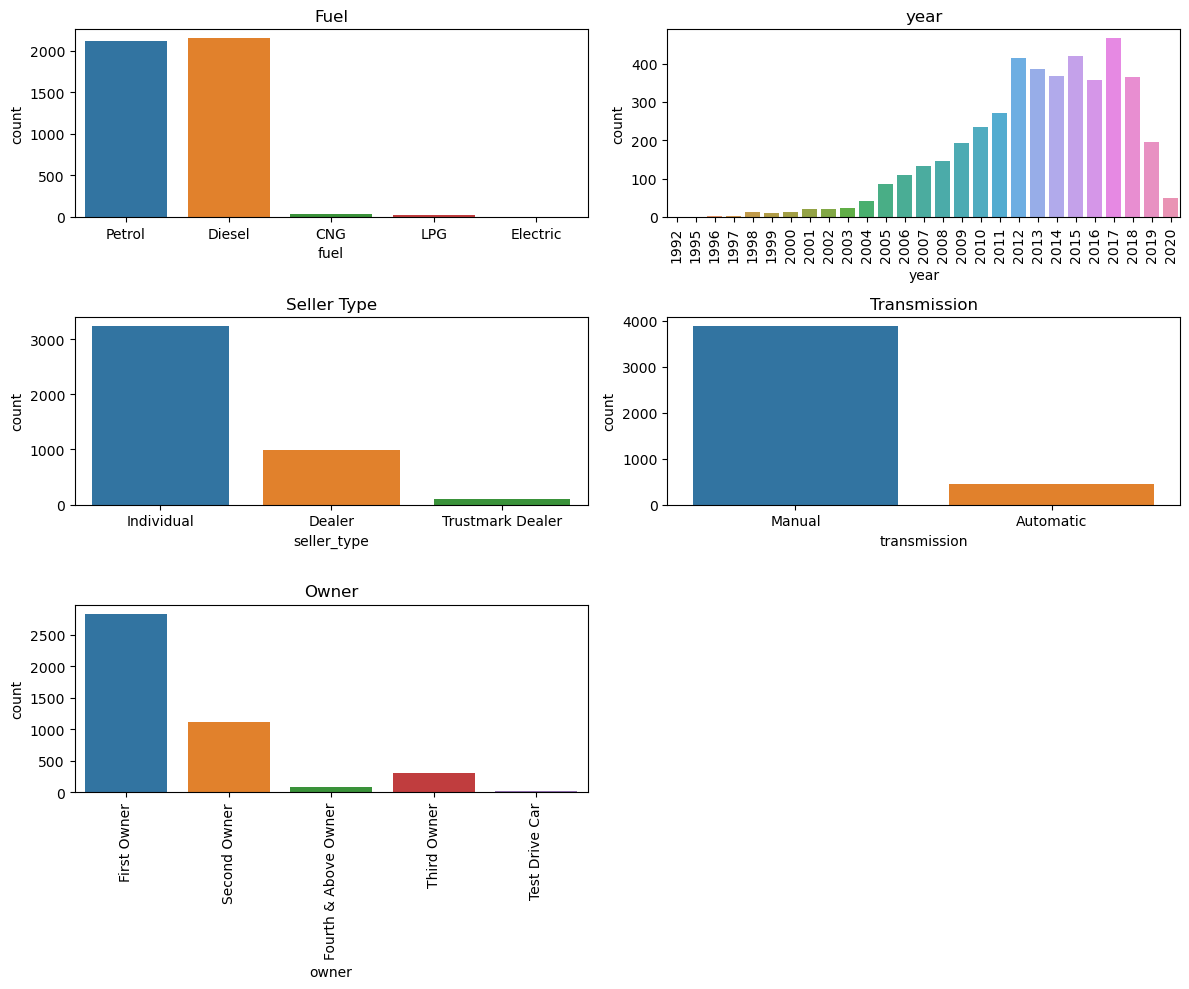

In [49]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
sns.countplot(x='fuel', data=df)
plt.title('Fuel')

plt.subplot(3, 2, 2)
sns.countplot(x='year', data=df)
plt.title('year')
plt.xticks(rotation=90) 

plt.subplot(3, 2, 3)
sns.countplot(x='seller_type', data=df)
plt.title('Seller Type')

plt.subplot(3, 2, 4)
sns.countplot(x='transmission', data=df)
plt.title('Transmission')

plt.subplot(3, 2, 5)
sns.countplot(x='owner', data=df)
plt.title('Owner')
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

<Axes: >

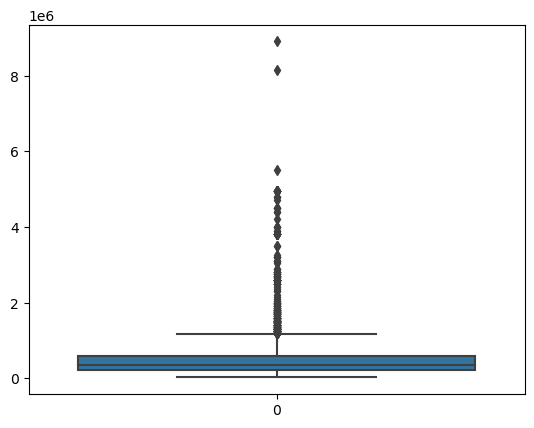

In [73]:
sns.boxplot(df['selling_price'])

<Axes: xlabel='km_driven', ylabel='Density'>

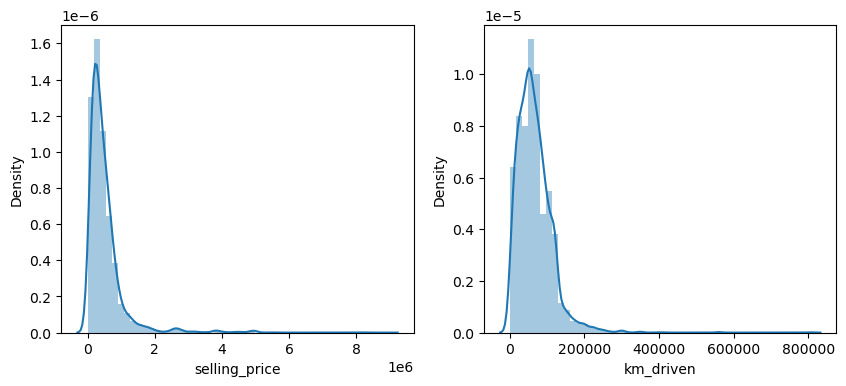

In [35]:
plt.figure(figsize=( 10, 4))

plt.subplot(1, 2, 1)
sns.distplot(df['selling_price'])

plt.subplot(1, 2, 2)
sns.distplot(df['km_driven'])

### Bivariant Data Analysis and Multivariate Data Analysis 

<Axes: xlabel='km_driven', ylabel='selling_price'>

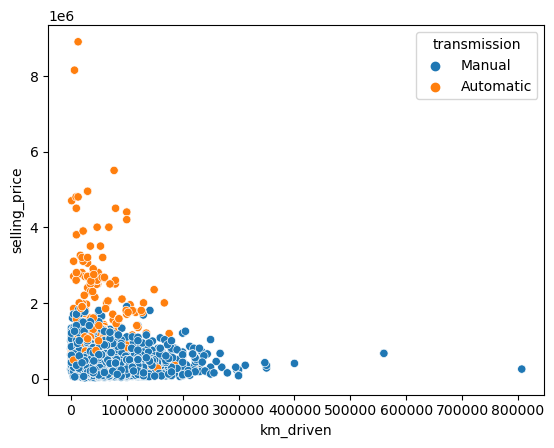

In [42]:

sns.scatterplot(x=df['km_driven'], y=df['selling_price'] , hue = df['transmission'])

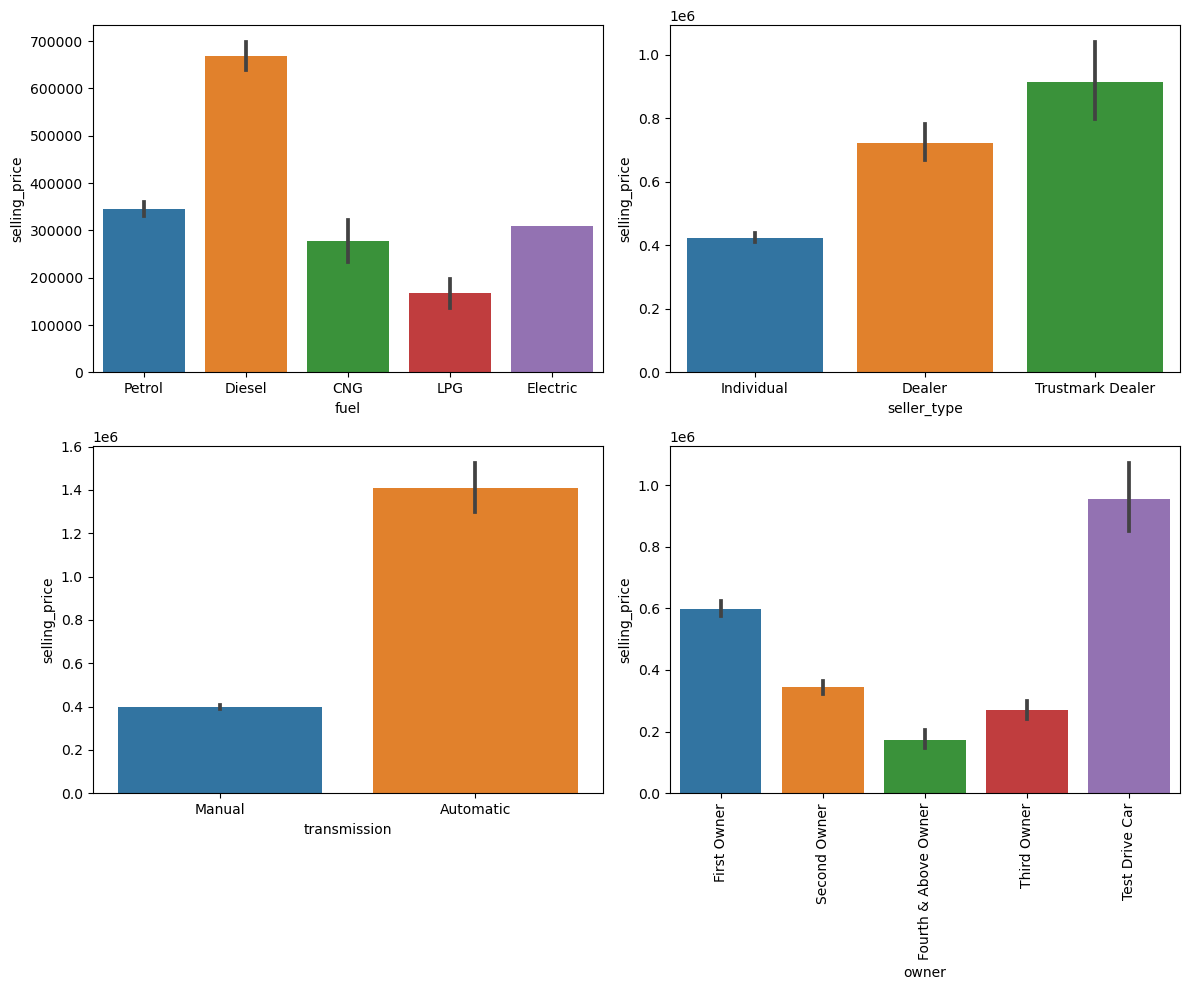

In [55]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='fuel', y='selling_price', data=df)


plt.subplot(2, 2, 2)
sns.barplot(x='seller_type', y='selling_price', data=df)

plt.subplot(2, 2, 3)
sns.barplot(x='transmission', y='selling_price', data=df)

plt.subplot(2, 2, 4)
sns.barplot(x='owner', y='selling_price', data=df)
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

In [56]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [57]:
df.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


<Axes: >

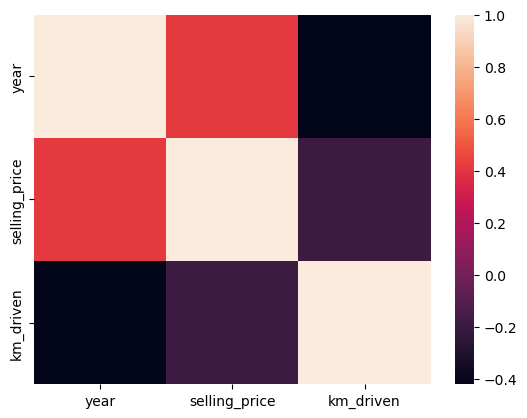

In [58]:
sns.heatmap(df.corr())

In [62]:
pd.crosstab(df['fuel'] , df['seller_type'])

seller_type,Dealer,Individual,Trustmark Dealer
fuel,,,
CNG,9,31,0
Diesel,529,1576,48
Electric,1,0,0
LPG,1,22,0
Petrol,454,1615,54


In [63]:
pd.crosstab(df['fuel'] ,df['transmission'] )

transmission,Automatic,Manual
fuel,,
CNG,0,40
Diesel,254,1899
Electric,1,0
LPG,0,23
Petrol,193,1930


In [68]:
pd.crosstab(df['fuel'] ,df['owner'])

owner,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
fuel,,,,,
CNG,21,3,14,0,2
Diesel,1404,34,552,7,156
Electric,0,0,1,0,0
LPG,10,1,10,0,2
Petrol,1397,43,529,10,144


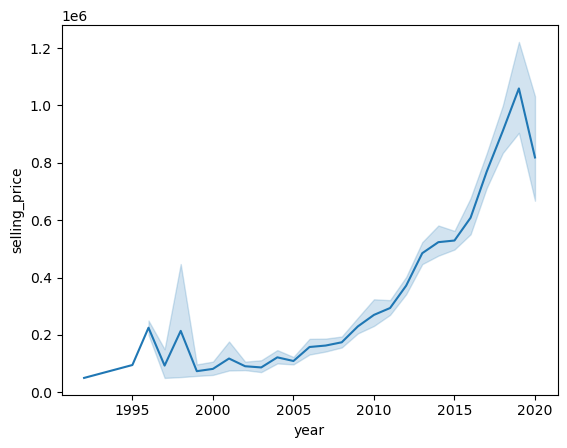

In [71]:
sns.lineplot(x=df['year'], y=df['selling_price'])
plt.show()